In [1]:
import numpy as np
import edf
from time import time
import sys
import matplotlib.pyplot as plt

In [2]:
traindata = './mnist_data/train.npz'
valdata = './mnist_data/test.npz'

data = np.load(traindata)
t_imgs = np.float32(data['imgs'])/255.
t_labels = np.float32(data['labels'])

data = np.load(valdata)
v_imgs = np.float32(data['imgs'])/255.
v_labels = np.float32(data['labels'])

Random accuracy = 0.1329
Epoch 0: train loss = 0.1711 [4.7677 secs]
test accuracy=0.95100
Epoch 1: train loss = 0.1259 [4.7802 secs]
test accuracy=0.96240
Epoch 2: train loss = 0.1132 [4.8337 secs]
test accuracy=0.96620
Epoch 3: train loss = 0.1086 [4.7887 secs]
test accuracy=0.97450
Epoch 4: train loss = 0.1784 [4.8022 secs]
test accuracy=0.96160
Epoch 5: train loss = 0.1216 [4.8072 secs]
test accuracy=0.96690
Epoch 6: train loss = 0.0868 [4.8297 secs]
test accuracy=0.97750
Epoch 7: train loss = 0.1312 [4.9063 secs]
test accuracy=0.97150
Epoch 8: train loss = 0.0963 [5.0679 secs]
test accuracy=0.98030
Epoch 9: train loss = 0.0817 [5.0614 secs]
test accuracy=0.97800


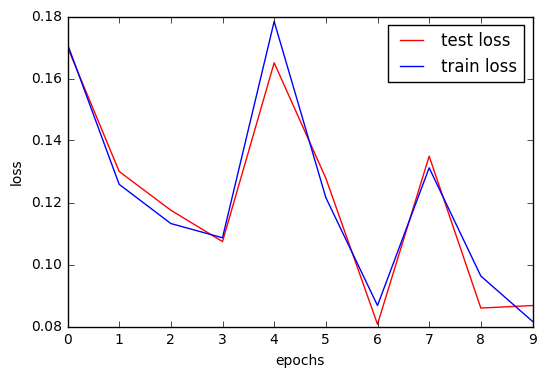

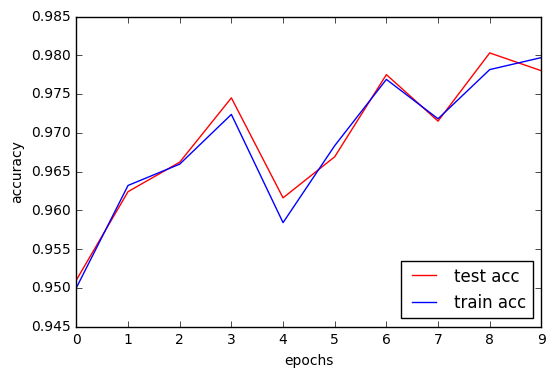

In [3]:
############################# Demonstration that SGD works for min-batch setting ############################## 


######################################### please modify this cell to finish the problem 2.a #######################
# for repeatability
np.random.seed(0)

# Inputs and parameters
inp = edf.Value()
lab = edf.Value()

W1 = edf.Param(edf.xavier((28*28,128)))
B1 = edf.Param(np.zeros((128)))
W2 = edf.Param(edf.xavier((128,10)))
B2 = edf.Param(np.zeros((10)))

# models
hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
loss = edf.LogLoss(edf.Aref(pred, lab))
acc = edf.Accuracy(pred,lab)

# batch size, please try 10, 50 and 100. For each run, you might need to reloading the kernel (edf.py) 
# to clear the history information
batch = 10
# learning rate eta, measured by per-batch unit. If you change this batch size, you might also change eta 
# accoridng to the equation given in the homework.
eta = 0.37
# eta = 0.0056 * batch + 0.0659
# evaluate the random performance
def eval(imgs, labels):
    
    batches = range(0, len(labels), batch)
    objective = 0
    accuracy = 0
    for k in batches:
        inp.set(t_imgs[k:k+batch])
        lab.set(t_labels[k:k+batch])
        edf.Forward()
        objective += np.mean(loss.value)
        accuracy += acc.value
    
    return accuracy/len(batches), objective/len(batches)


accuracy, objective = eval(t_imgs, t_labels)
print("Random accuracy = %.4f" % accuracy)

# train loop
train_loss = []
train_acc = []
test_loss = []
test_acc = []
ep = 0
stime = time()
epoch = 10
batches = range(0, len(t_labels), batch)

while ep < epoch:

    # randon shuffle the train data in each epoch
    perm = np.random.permutation(len(t_labels))
    for k in batches:    
        inp.set(t_imgs[perm[k:k+batch]])
        lab.set(t_labels[perm[k:k+batch]])
        edf.Forward()
        edf.Backward(loss)
        edf.SGD(eta)

    # evaluate on trainset
    t_acc, t_loss = eval(t_imgs, t_labels)
    print("Epoch %d: train loss = %.4f [%.4f secs]" % (ep, t_loss,time()-stime))
    train_loss.append(t_loss)
    train_acc.append(t_acc)

    # evaluate on testset
    v_acc, v_loss = eval(v_imgs, v_labels)
    print("test accuracy=%.5f" % v_acc)
    test_loss.append(v_loss)
    test_acc.append(v_acc)
    stime = time()
    ep += 1

# plot
plt.figure(1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss)), test_loss, color='red')
plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()

plt.figure(2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(np.arange(len(test_acc)), test_acc, color='red')
plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
plt.legend(['test acc', 'train acc'], loc='lower right')
plt.show()    

In [ ]:
################### please modify this cell to finish the problem 2.b #########################################


# Optimization functions with Momentum algorithm, eta is learning rate and mom is momentum rate
# please implement this function
def Momentum(eta, mom = 0.55):
    # Initialize the "grad_hist" variable to memorize the history of gradient
    if 'grad_hist' not in edf.params[0].__dict__.keys():
        for p in edf.params:
            p.grad_hist = edf.DT(0)
    # please add code here to finish the function
    for p in edf.params:
        p.grad_hist = mom * p.grad_hist + (1 - mom)* p.grad
        p.value -= eta * p.grad_hist
        p.grad = edf.DT(0)
    
    
# for repeatability
np.random.seed(0)

# Inputs and parameters
inp = edf.Value()
lab = edf.Value()

W1 = edf.Param(edf.xavier((28*28,128)))
B1 = edf.Param(np.zeros((128)))
W2 = edf.Param(edf.xavier((128,10)))
B2 = edf.Param(np.zeros((10)))

# models
hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
loss = edf.LogLoss(edf.Aref(pred,lab))
acc = edf.Accuracy(pred,lab)

# batch size, please also try 10 and 100
batch = 100
# learning rate eta, measured by per-batch. If you change this batch size, you might also change eta 
# accoridng to the equation given in the homework.
eta = 0.37
#eta = 0.0056 * batch + 0.0659

# evaluate the random performance
def eval(imgs, labels):
    
    batches = range(0, len(labels), batch)
    objective = 0
    accuracy = 0
    for k in batches:
        inp.set(t_imgs[k:k+batch])
        lab.set(t_labels[k:k+batch])
        edf.Forward()
        objective += np.mean(loss.value)
        accuracy += acc.value
    
    return accuracy/len(batches), objective/len(batches)


accuracy, objective = eval(t_imgs, t_labels)
print("Random accuracy = %.4f" % accuracy)

# train loop
train_loss = []
train_acc = []
test_loss = []
test_acc = []
ep = 0
stime = time()
epoch = 10
batches = range(0, len(t_labels), batch)

while ep < epoch:

    # randon shuffle the train data in each epoch
    perm = np.random.permutation(len(t_labels))
    for k in batches:    
        inp.set(t_imgs[perm[k:k+batch]])
        lab.set(t_labels[perm[k:k+batch]])
        edf.Forward()
        edf.Backward(loss)
        
        # here, we use Momentum to optimize as in problem 2.b
        Momentum(eta)
    # evaluate on trainset
    t_acc, t_loss = eval(t_imgs, t_labels)
    print("Epoch %d: train loss = %.4f [%.3f secs]" % (ep, t_loss,time()-stime))
    train_loss.append(t_loss)
    train_acc.append(t_acc)

    # evaluate on testset
    v_acc, v_loss = eval(v_imgs, v_labels)
    print("test accuracy=%.4f" % v_acc)
    test_loss.append(v_loss)
    test_acc.append(v_acc)
    stime = time()
    ep += 1

# plot
plt.figure(1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss)), test_loss, color='red')
plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()

plt.figure(2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(np.arange(len(test_acc)), test_acc, color='red')
plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
plt.legend(['test acc', 'train acc'], loc='lower right')
plt.show()

In [ ]:
################### please modify this cell to finish the problem 2.c #########################################

# Optimization functions with Adam optimization algorithm.
# For details, please see: https://arxiv.org/abs/1412.6980, 
# Please implement this function

# some constant used in Adam
_a_b1t=edf.DT(1.0)
_a_b2t=edf.DT(1.0)

def Adam(eta=0.001, b1 = 0.9, b2 = 0.999, ep=1e-8):
    
    global _a_b1t
    global _a_b2t

    # Initialize the "grad_hist" variable to memorize the history of gradient
    # # Initialize the "grad_h2" variable to memorize the history of gradient variance
    if 'grad_hist' not in edf.params[0].__dict__.keys():
        for p in edf.params:
            p.grad_hist = edf.DT(0)
            p.grad_h2 = edf.DT(0)

    # please finish this function
    for p in edf.params:
        p.grad_hist = b1 * p.grad_hist + (1 - b1) * p.grad
        p.grad_h2 = b2 * p.grad_h2 + (1 - b2) * np.square(p.grad)
        hist_hat = p.grad_hist / _a_b1t
        h2_hat = p.grad_h2 / _a_b2t
        p.value -= eta * hist_hat / (np.sqrt(h2_hat) + ep)
        p.grad = edf.DT(0)
    
    
# for repeatability
np.random.seed(0)

# Inputs and parameters
inp = edf.Value()
lab = edf.Value()

W1 = edf.Param(edf.xavier((28*28,128)))
B1 = edf.Param(np.zeros((128)))
W2 = edf.Param(edf.xavier((128,10)))
B2 = edf.Param(np.zeros((10)))

# Init params to avoid restarting kernel
for p in edf.params:
    p.grad_hist = edf.DT(0)
    p.grad_h2 = edf.DT(0)

# models
hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
loss = edf.LogLoss(edf.Aref(pred,lab))
acc = edf.Accuracy(pred,lab)


# batch size, try set to 10, 50, 100
batch = 50
# eta is the learning rate and measured by per-batch unit, please tune it a little bit under different batch size.
eta = 0.0017


# evaluate the random performance
def eval(imgs, labels):
    
    batches = range(0, len(labels), batch)
    objective = 0
    accuracy = 0
    for k in batches:
        inp.set(t_imgs[k:k+batch])
        lab.set(t_labels[k:k+batch])
        edf.Forward()
        objective += np.mean(loss.value)
        accuracy += acc.value
    
    return accuracy/len(batches), objective/len(batches)


accuracy, objective = eval(t_imgs, t_labels)
print("Random accuracy = %.4f" % accuracy)

# train loop
train_loss = []
train_acc = []
test_loss = []
test_acc = []
ep = 0
stime = time()
epoch = 10
batches = range(0, len(t_labels), batch)

while ep < epoch:

    # randon shuffle the train data in each epoch
    perm = np.random.permutation(len(t_labels))
    for k in batches:    
        inp.set(t_imgs[perm[k:k+batch]])
        lab.set(t_labels[perm[k:k+batch]])
        edf.Forward()
        edf.Backward(loss)
        
        # here, we use Adam algorithm to optimize as in problem 2.c
        Adam(eta)

    # evaluate on trainset
    t_acc, t_loss = eval(t_imgs, t_labels)
    print("Epoch %d: train loss = %.4f [%.3f secs]" % (ep, t_loss,time()-stime))
    train_loss.append(t_loss)
    train_acc.append(t_acc)

    # evaluate on testset
    v_acc, v_loss = eval(v_imgs, v_labels)
    print("test accuracy=%.4f" % v_acc)
    test_loss.append(v_loss)
    test_acc.append(v_acc)
    stime = time()
    ep += 1

# plot
plt.figure(1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss)), test_loss, color='red')
plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()

plt.figure(2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(np.arange(len(test_acc)), test_acc, color='red')
plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
plt.legend(['test acc', 'train acc'], loc='lower right')
plt.show()    